# A. Traina 2024

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Saunders function
def saunders_function(L, alpha, sigma, L_star, phi_star):
    return phi_star * (L / L_star)**(1-alpha) * np.exp(-1 / (2*sigma**2) * (np.log10(1 + (L / L_star)))**2)

# Saunders function
def integrate_saunders_function(L, alpha, sigma, L_star, phi_star):
    return phi_star * (L / L_star)**(1-alpha) * np.exp(-1 / (2*sigma**2) * (np.log10(1 + (L / L_star)))**2)

# Redshift bins
redshift_bins = [[0.5, 1.0], 
                 [1.0, 1.5], 
                 [1.5, 2.0], 
                 [2.0, 2.5], 
                 [2.5, 3.0], 
                 [3.0, 3.5], 
                 [3.5, 4.5], 
                 [4.5, 6.0]]
z = np.mean(redshift_bins, axis=1) # central values of redshift bins

# Parameters
alpha = [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]
sigma = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
lstar = [10.94, 11.29, 11.61, 11.84, 12.05, 12.07, 12.05, 12.07]
pstar = [-2.44, -2.77, -3.09, -3.32, -3.55, -3.71, -3.97, -4.24]

# 16th and 84th
# lstar = [10.93, 11.27, 11.58, 11.79, 11.93, 11.93, 11.81, 11.57] # 16th
# lstar = [10.95, 11.31, 11.66, 11.90, 12.15, 12.27, 12.47, 12.69] # 84th
# pstar = [-2.49, -2.84, -3.19, -3.44, -3.71, -3.90, -4.20, -4.53] # 16th
# pstar = [-2.40, -2.73, -3.04, -3.24, -3.46, -3.61, -3.84, -4.10] # 84th

# Luminosity bins
T_L_10 = [11.50, 11.75, 12.00, 12.25, 12.50]
T_L_15 = [11.50, 11.75, 12.00, 12.25, 12.50, 12.75, 13.00]
T_L_20 =        [11.75, 12.00, 12.25, 12.50, 12.75, 13.00]
T_L_25 =        [11.75, 12.00, 12.25, 12.50, 12.75, 13.00]
T_L_30 =        [11.75, 12.00, 12.25, 12.50, 12.75, 13.00, 13.25]
T_L_35 =        [11.75, 12.00, 12.25, 12.50, 12.75, 13.00]
T_L_45 = [11.50, 11.75, 12.00, 12.25, 12.50, 12.75, 13.00, 13.25]
T_L_60 =        [11.75, 12.00, 12.25, 12.50, 12.75, 13.00, 13.25]
T_L = [T_L_10, T_L_15, T_L_20, T_L_25, T_L_30, T_L_35, T_L_45, T_L_60]

# Phi values
T_P_10 = [-4.54, -4.54, -4.44, -4.17, -4.50]
T_P_15 = [-4.61, -4.12, -3.95, -3.97, -4.32, -4.99, -4.99]
T_P_20 =        [-4.03, -3.43, -3.31, -3.62, -4.38, -5.14]
T_P_25 =        [-4.46, -4.08, -3.79, -3.68, -3.90, -4.48]
T_P_30 =        [-4.93, -4.04, -3.76, -3.87, -4.07, -4.28, -5.19]
T_P_35 =        [-4.76, -4.27, -3.91, -3.83, -4.03, -4.47]
T_P_45 = [-4.67, -4.53, -4.85, -4.42, -4.29, -4.48, -4.59, -4.93]
T_P_60 =        [-5.21, -4.81, -4.60, -4.64, -5.01, -5.25, -5.58]
T_P = [T_P_10, T_P_15, T_P_20, T_P_25, T_P_30, T_P_35, T_P_45, T_P_60]

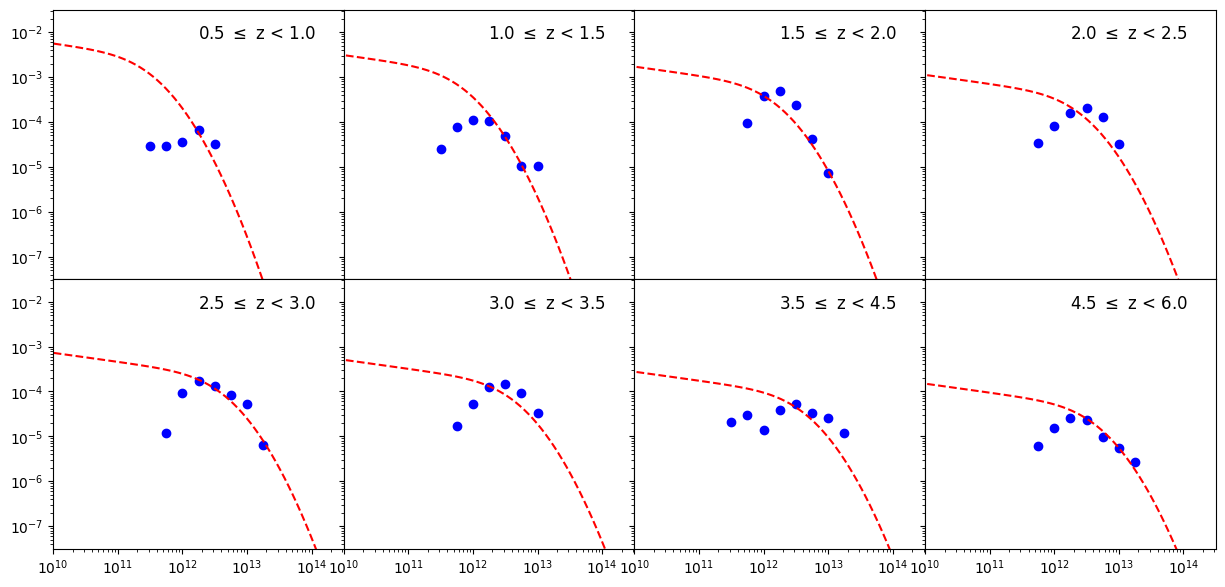

In [181]:
fig, axes = plt.subplots(2, 4, figsize=(15, 7), sharex=True, sharey=True)
axes = axes.flatten()

for ax, L, P, a, s, ls, ps, (z_start, z_end) in zip(axes, T_L, T_P, alpha, sigma, lstar, pstar, redshift_bins):
    ax.set_title(f'{z_start} $\leq$ z < {z_end}', y=0.86, x=0.7)
    ax.scatter(np.power(10, L), np.power(10, P), color='blue')
    ax.plot(np.logspace(8, 14.5, 100), saunders_function(np.logspace(8, 14.5, 100), a, s, 10**ls, 10**ps), color='red', linestyle='--')
    # print(saunders_function(np.logspace(8, 14.5, 100), a, s, 10**ls, 10**ps))
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(10**10, 10**14.5)
    ax.set_ylim(10**-7.5, 10**-1.5)
    
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

Difference --- [2.29 2.   1.95 1.95 1.91 1.45 1.23 1.29]
Average difference --- 1.76


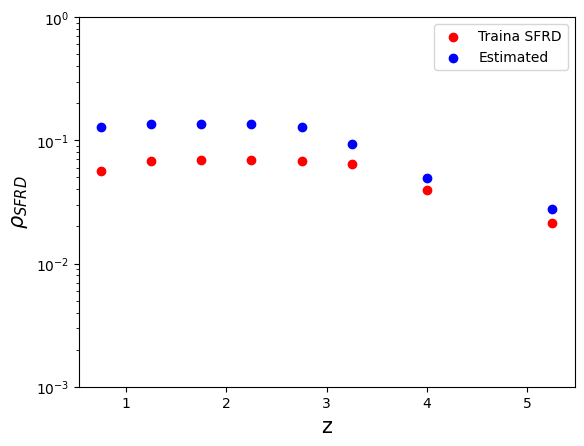

In [182]:
# Calculate the density
IR_density = []
for a, s, ls, ps in zip(alpha, sigma, lstar, pstar): 
    IR_density.append(integrate.quad(integrate_saunders_function, 10**8, 10**14, args=(a, s, 10**ls, 10**ps))[0])

# Kennicut SFR and Chabrier IMF conversion
SFRD = np.array(IR_density) * 1*10**(-10) 

# Plot the original SFRD
tra_sfrd = np.power(10, [-1.25, -1.17, -1.16, -1.16, -1.17, -1.19, -1.40, -1.67])
plt.scatter(z, tra_sfrd, color='red', label='Traina SFRD')

# Calculate the difference
diff = np.array(SFRD) / tra_sfrd
print(f'Difference --- {np.round(diff,2)}')
print(f'Average difference --- {np.round(np.mean(diff),2)}')

# Plot the estimated SFRD  
plt.scatter(z, SFRD, color='blue', label='Estimated')
plt.ylabel(r'$\rho_{SFRD}$', fontsize=15)
plt.xlabel('z', fontsize=15)
plt.yscale('log')
plt.ylim(10**-3, 10**0)
plt.legend()
plt.show()